In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set(style="whitegrid")


In [2]:
tickers = ["TSLA", "SPY"]

df = yf.download(tickers, start="2022-01-01", end="2023-01-01")

# extract Adj Close (robust)
prices = df['Close']


prices.head()


C:\Users\siddh\AppData\Local\Temp\ipykernel_11820\3039853998.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start="2022-01-01", end="2023-01-01")
[*********************100%***********************]  2 of 2 completed


Ticker,SPY,TSLA
Date,,
2022-01-03,453.210388,399.926666
2022-01-04,453.058685,383.196655
2022-01-05,444.358856,362.706665
2022-01-06,443.941498,354.899994
2022-01-07,442.186401,342.320007


In [3]:
returns = prices.pct_change().dropna()
returns.head()


Ticker,SPY,TSLA
Date,,
2022-01-04,-0.000335,-0.041833
2022-01-05,-0.019202,-0.053471
2022-01-06,-0.000939,-0.021523
2022-01-07,-0.003953,-0.035447
2022-01-10,-0.001245,0.030342


In [4]:
Y = returns["TSLA"]
X = returns["SPY"]

X = sm.add_constant(X)   # adds intercept term
model = sm.OLS(Y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   TSLA   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           2.17e-30
Time:                        15:11:49   Log-Likelihood:                 509.65
No. Observations:                 250   AIC:                            -1015.
Df Residuals:                     248   BIC:                            -1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.002     -1.310      0.1

In [5]:
spy = returns["SPY"].values
tsla = returns["TSLA"].values

# beta = Cov(TSLA, SPY) / Var(SPY)
beta = np.cov(tsla, spy)[0, 1] / np.var(spy)

# alpha = mean(TSLA) - beta * mean(SPY)
alpha = tsla.mean() - beta * spy.mean()

beta, alpha


(np.float64(1.7329730438720334), np.float64(-0.002619635245626901))

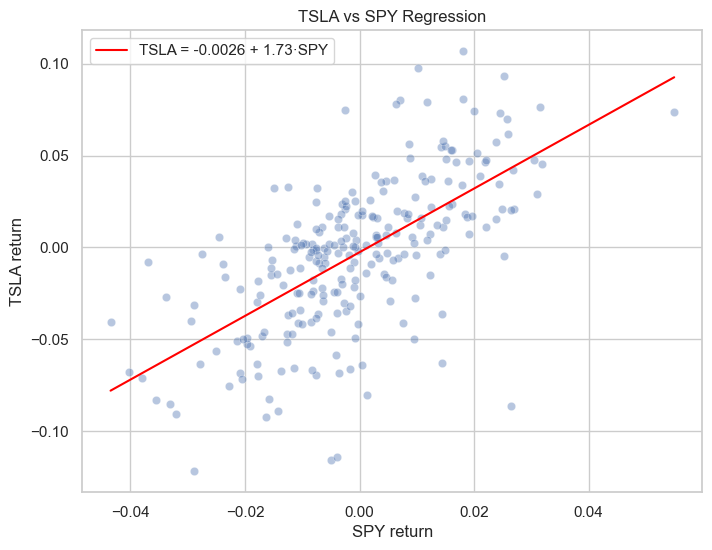

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=returns["SPY"], y=returns["TSLA"], alpha=0.4)

# regression line
x_vals = np.linspace(returns["SPY"].min(), returns["SPY"].max(), 100)
y_vals = alpha + beta * x_vals

plt.plot(x_vals, y_vals, color="red", label=f"TSLA = {alpha:.4f} + {beta:.2f}·SPY")
plt.xlabel("SPY return")
plt.ylabel("TSLA return")
plt.legend()
plt.title("TSLA vs SPY Regression")
plt.show()


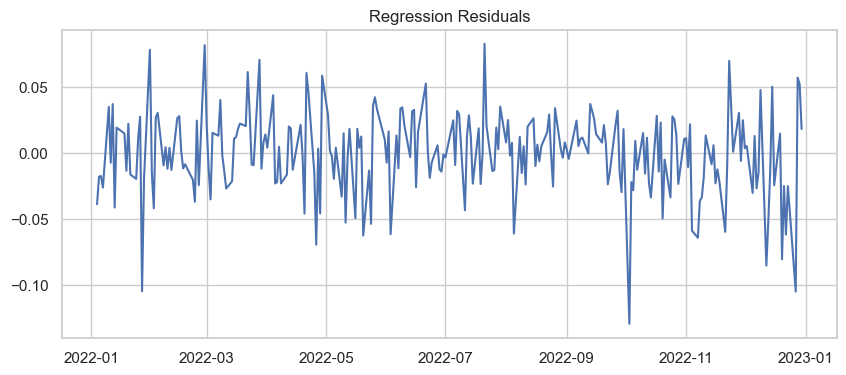

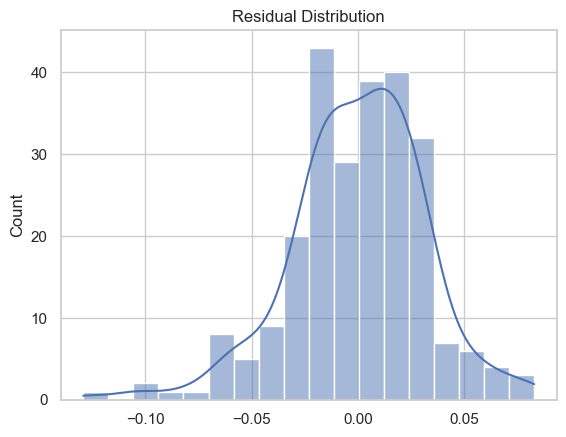

In [7]:
residuals = model.resid

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Regression Residuals")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Autocorrelation test
lb = acorr_ljungbox(residuals, lags=[10], return_df=True)
lb


,lb_stat,lb_pvalue
10,15.506757,0.11465


In [19]:
tickers = ['AAPL','SPY']
dn = yf.download(tickers, start = '2022-01-01', end = '2023-01-01')
prices = dn['Close']


C:\Users\siddh\AppData\Local\Temp\ipykernel_11820\221358759.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dn = yf.download(tickers, start = '2022-01-01', end = '2023-01-01')
[*********************100%***********************]  2 of 2 completed


In [20]:
returns = prices.pct_change().dropna()
returns

Ticker,AAPL,SPY
Date,,
2022-01-04,-0.012691,-0.000335
2022-01-05,-0.026600,-0.019202
2022-01-06,-0.016693,-0.000939
2022-01-07,0.000988,-0.003953
2022-01-10,0.000116,-0.001245
...,...,...
2022-12-23,-0.002798,0.005752
2022-12-27,-0.013878,-0.003943
2022-12-28,-0.030686,-0.012428


In [24]:
apl = returns['AAPL']
spy = returns['SPY']
X = sm.add_constant(spy)
Y = apl
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     900.1
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           1.70e-84
Time:                        15:49:56   Log-Likelihood:                 786.20
No. Observations:                 250   AIC:                            -1568.
Df Residuals:                     248   BIC:                            -1561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.001     -0.229      0.8

In [29]:
tickers = ['AAPL','MSFT','SPY','TSLA']
df = yf.download( tickers, '2022-01-01','2023-01-01')
prices = df['Close']
returns = prices.pct_change().dropna()

C:\Users\siddh\AppData\Local\Temp\ipykernel_11820\3776279126.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download( tickers, '2022-01-01','2023-01-01')
[*********************100%***********************]  4 of 4 completed


In [33]:
y = returns['SPY']
a = returns[['MSFT','TSLA','AAPL']]

a = sm.add_constant(a)
model = sm.OLS(y,a).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SPY   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     498.7
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          3.13e-104
Time:                        16:08:21   Log-Likelihood:                 935.49
No. Observations:                 250   AIC:                            -1863.
Df Residuals:                     246   BIC:                            -1849.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.873e-05      0.000      0.241      0.8

In [34]:
returns['TSLA'].rolling(30).cov(returns['SPY']) / returns['SPY'].rolling(30).var()


Date
2022-01-04         NaN
2022-01-05         NaN
2022-01-06         NaN
2022-01-07         NaN
2022-01-10         NaN
                ...   
2022-12-23    1.365562
2022-12-27    1.356600
2022-12-28    1.176571
2022-12-29    1.457944
2022-12-30    1.423160
Length: 250, dtype: float64